## **PREDICTING PRESENCE OF HEART DISEASES USING MACHINE LEARNING ALGORITHMS**


![texto alternativo](https://pacerecruiters.com/wp-content/uploads/sites/12/2018/10/medical-device-engineer-boston-biomedical-engineering-jobs-boston-medical-engineer-jobs-1.jpg)


---





###Data Analytics Technologies Final Project
Sumbitted by Padro Corrales de la Hoz and Patricia Martin Ballesteros 




## **Description of the project**


Source: https://www.kaggle.com/ronitf/heart-disease-uci 

We take patient medical data information from the Cleveland database to analyze it and try to know if studying people medical data we can found out if they are going to have heart disease or not.

One-third of all global deaths are due to heart issues, in USA the half of the deaths are due to heart ailment. Around 17 million people die due to cardiovascular disease every year and in Asia the disease is highly. The lifestyle habits such as eating, smoking or physical inactivity and other medical information (age, sex, cholesterol or diabetes)  are considered to be big risky factors for heart disease. There are different types of disease and it is difficult to determine the odds of getting heart disease based on risky factors. 

Machine learning techniques are useful to predict the output from existing data. One reason for fatality due to heart disease is due to the fact that the risks are either not identified, or they are identified only at a larger stage. However, machine learning techniques can be useful for overcoming this problem and to predict risk at an early stage. The existing research has used ensemble methods to improve classification accuracy in prediction of heart disease. 

The dataset is composed by 76 different attributes but we are using the 13 more important attributes, all experiment published about this problem are using this attributes:

- Age
- Sex
- Chest pain type (4 values)
- Resting blood pressure
- Serum cholesterol in mg/dl
- Fasting blood sugar > 120 mg/dl
- Resting electrocardiographic results (values 0,1,2)
- Maximum heart rate achieved
- Exercise induced angina
- Oldpeak = ST depression induced by exercise relative to rest
- The slope of the peak exercise ST segment
- Number of major vessels (0-3) colored by fluoroscopy
- Thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
- Target 1 or 0

Patients in this data has the age from 29 to 79. Male are detonated by a gender value 1 and female gender value 0. We have four types of chest pain type (1-Typical type, 2-Atypical type angina, 3-Non-angina pain and 4- Asymptomatic). We also have attributes for the resting blood pressure(94 to 200), Serum cholesterol (126 to 564), Fasting blood sugar level (1=below 120 mg/dl and 0=above 120 mg/dl), Resting electrocardiographic result (0,1,2), maximum heart rates (71 to 202), the exercise induced angina which is recorded as 1 if there is pain and 0 if there is no pain, oldpeak is the depression induced by exercise (1 to 3), the slope of the peak exercise (1,2,3), number of major vessels colored by fluoroscopy (0 to 3), Tha; (3=normal; 6=fixes detect: 7=reversible) and Target is class attribute (0 or 1). 


## **Review of the project**

The heart disease is one of the most complex and life deadliest human diseases in the world, and the rate in the United States it is very high. The European Society of Cardiology (ESC) reported that 26 million adults worldwide were diagnosed with heart disease and 3.6 million were diagnosed every year. Moreover, around 50% of heart disease people suffering from heart disease die within initial 1-2 years, and concerned costs of heart disease management are approximately 3% of health-care financial budget.

The investigation techniques in early stages used to identify heart disease were complicated, and its resulting complexity is one of the major reasons that affect the standard of life. The heart disease diagnosis and treatment are very complex, but it is very necessary to have an accurate diagnosis of the heart disease risk in patients in order to reduce heart issues and improve security of heart. 

Here is where machine learning comes because its techniques can significantly benefit the medical field by providing an accurate and quick diagnosis of diseases. Hence, save time for both doctors and patients.

Physicians routinely make treatment decisions using risk scores, which are based on few variables and are typically only moderately accurate for individual patients. Machine learning can use repetition and adjustment to exploit large quantities of data and identify complex patterns that may go unnoticed by humans. Such information, if predicted well in advance, can provide important insights to doctors who can then adapt their diagnosis and treatment per patient basis.

There have been various research projects that have used ML to predict heart diseases - many of them posted on Kaggle, where we found which models work better and give higher accuracy. The most popular algorithms are Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Naive Bayes, Decision Tree and Random Forest. 
After checking the result of the accuracy of each algorithm in the different posted notebooks we realized that Decision Tree gives significantly the worst prediction with an accuracy around 70%. 
By far, SVM seems to be the best predictor by average, but Random Forest and Naive Bayes share the best accuracy with an 88.52%. Besides, Logistic Regression and KNN have also good results with accuracy values between 79% and 86.89%. 
Previous research have also shown that Naive Bayes was found to be the best algorithm due to its simplicity and accuracy. Moreover, Sex, age, smoking, hypertension, and diabetes seem to be the major risk factors for heart disease. 

Given the above and if the model has some predictive ability, we should see these factors standing out as the most important. 


## **Import Data**





In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


After importing the data, we are going to import all the libraries we will be using through the analysis.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import io
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve, accuracy_score, confusion_matrix, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [ ]:
heartdf = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
heartdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


After importing the data, we can see it is a clean, easy to understand dataset. Next, we are going to take a look of the data to see if there is any null values and take an overview of the data.


## **Data Exploration and Visualization**

In [ ]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heartdf.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Checking if there is any null values
heartdf.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

As you can see from the output above, there is no missing values so there is no need to clean it. We also got a view of the range of the different features - the minimun value of age is 29 and for thalach is 71. We will be normalizing the data before building our models. Next, we can see more detailed information about each variable to get a better understanding.

In [ ]:
profile = pandas_profiling.ProfileReport(heartdf)
profile

Number of variables,14
Number of observations,303
Total Missing (%),0.0%
Total size in memory,33.3 KiB
Average record size in memory,112.4 B
Numeric,10
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,0


Now, we are going to start creating graphs to try to find patters and the distributions of the variables and correlations between them.

In [ ]:
plt.rcParams['figure.figsize'] = (12, 10)
plt.style.use('ggplot')

sns.heatmap(heartdf.corr(), annot = True, cmap = 'Blues')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()


The heat map shows the correlations between the different attributes of the dataset. We can see that almost all of the features given in the dataset are very less correlated with each other. This implies we must include all of the features, as we can only remove those features where the correlation of two or more attributes are really high. We can highlight some of them like: 
- Target and chest pain type (cp) are mildly positively correlated (0.43).
- Target and maximum heart rate achieved (thalach) are also mildly positively correlated (0.42).
- Target and exercise induced angina (exang) are gently negatively correlated (-0.44).
- Target and ST depression induced by exercise relative to rest (oldpeak) are also mildly negatively correlated (-0.43).

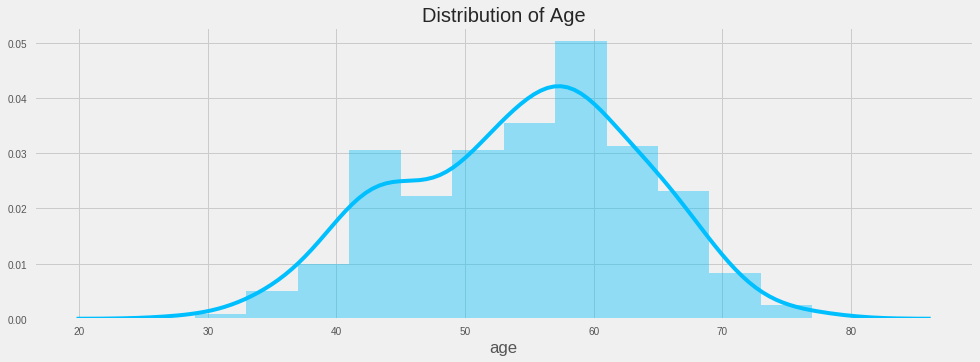

In [ ]:
# checking the distribution of age amonng the patients
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(heartdf['age'], color = 'deepskyblue')
plt.title('Distribution of Age', fontsize = 20)
plt.show()


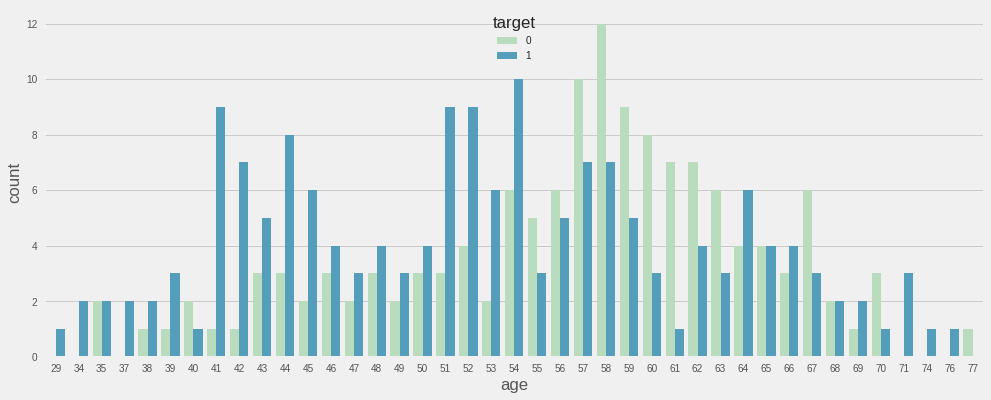

In [ ]:
#Number of people who have heart disease according to age
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = heartdf, hue = 'target',palette='GnBu')
plt.show()

As we can appreciate in the first graph, the age variable distribution is approximately normal. Also, we see that the highest number of people that have from heart diseases are in the age group of 55-65 years. The patients in the age group 20-30 are very less likely to suffer from heart diseases.

Since the number of people in the age group 65-80 has a very low population, hence distribution is also less. we might have to opt for other plots to investigate further and get some more intuitive results.

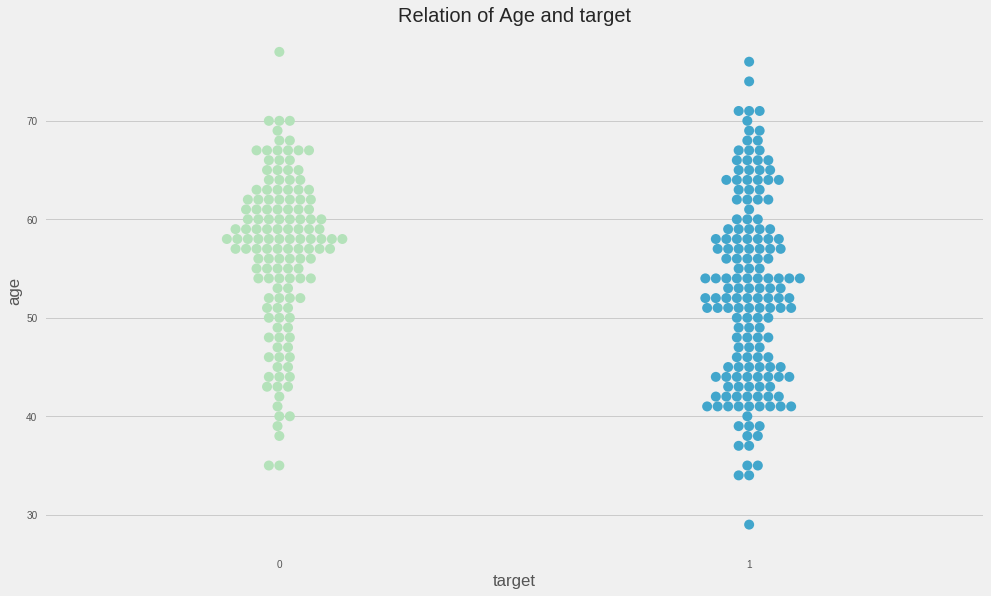

In [ ]:
# relation between age and target
plt.rcParams['figure.figsize'] = (15, 9)
sns.swarmplot(heartdf['target'], heartdf['age'], palette = 'GnBu', size = 10)
plt.title('Relation of Age and target', fontsize = 20, fontweight = 30)
plt.show()

From the above Swarm plot between the age of patients and target,we are not able to find any defined pattern, so age is not a very good attribute to determine the heart disease of a patient. Since a patient of heart diseases range from 30-70, it is not important that all of the people lying in that same age group are bound to suffer from the heart diseases.

We can see that the people suffering from heart disease (target = 1) and people who are not suffering it (target = 0) have similar ages.

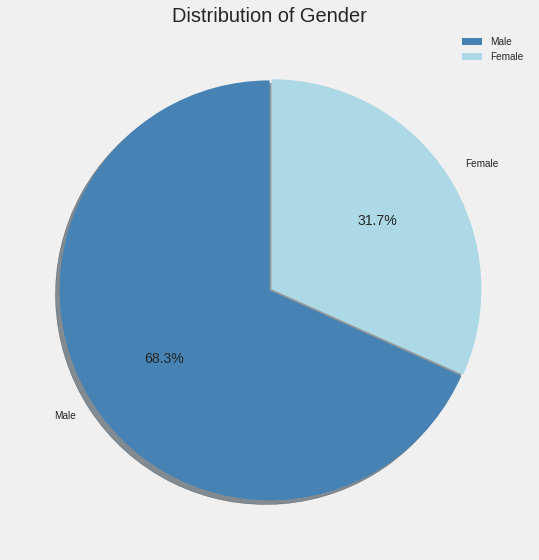

In [ ]:
# plotting a chart for visualizing each of the recruitment channel's share
size = heartdf['sex'].value_counts()
colors = ['steelblue', 'lightblue']
labels = "Male", "Female"
explode = [0, 0.01]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%1.1f%%',startangle=90)
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
plt.legend()
plt.show()

The above pie chart shows us the distribution of gender in the dataset. By looking at the plot, we can expect that males are two times more likely to suffer from heart diseases in comparison to females - 68% of the patients are men whereas only 32% are women. More number of men took participation in heart disease check ups. But we will continue exploring age to see if which gender really has more heart diseases. 

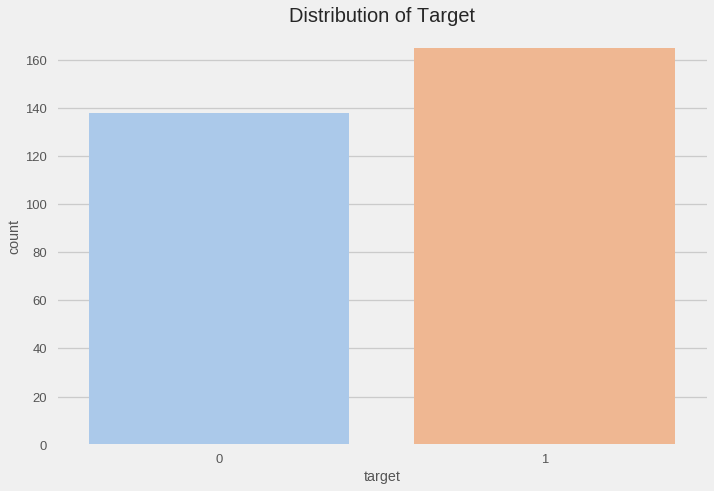

In [ ]:
#target distribution
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-talk')
sns.countplot(heartdf['target'], palette = 'pastel')
plt.title('Distribution of Target', fontsize = 20)
plt.show()


Let's look at the target, the dataset is quite balanced with almost equal number of positive and negative classes. It is important to mention that the positive class says that the patient is suffering from the disease and the negative class says that the patient is not suffering from the disease.

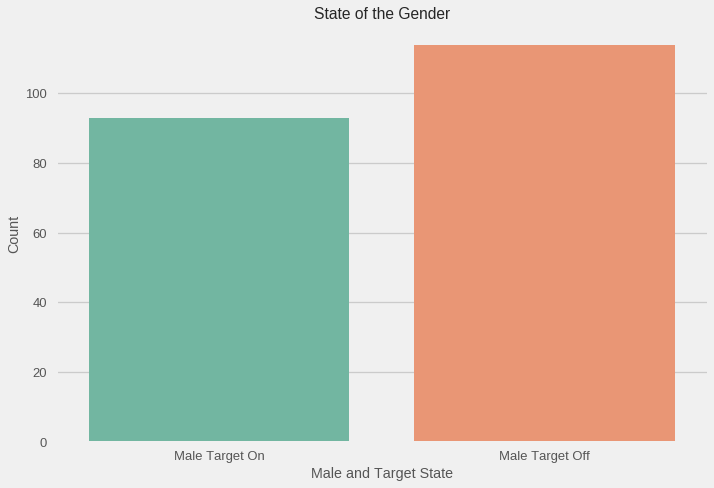

In [ ]:
#Male State & target 
male_andtarget_on=len(heartdf[(heartdf.sex==1)&(heartdf['target']==1)])
male_andtarget_off=len(heartdf[(heartdf.sex==1)&(heartdf['target']==0)])

sns.barplot(x=['Male Target On','Male Target Off'],y=[male_andtarget_on,male_andtarget_off], palette = 'Set2')
plt.xlabel('Male and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

In the graphic above we can see the relation between males and the target. The number of males who hasn´t have heart disease is less than 
the males who have heart disease. However this difference is not that big.

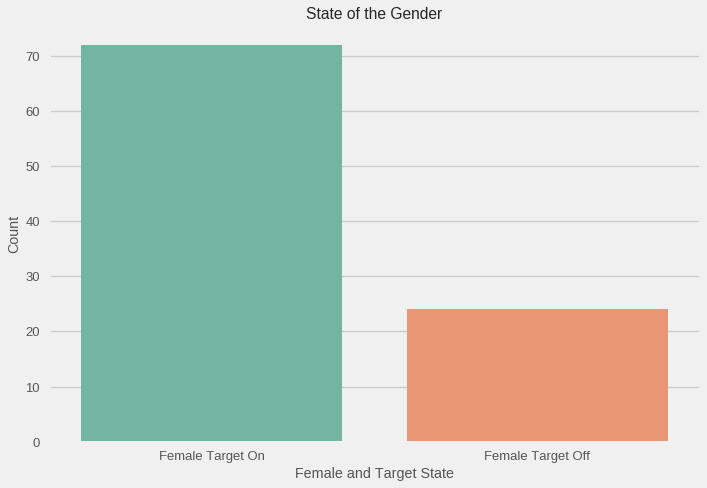

In [ ]:
#Female State & target 
female_andtarget_on=len(heartdf[(heartdf.sex==0)&(heartdf['target']==1)])
female_andtarget_off=len(heartdf[(heartdf.sex==0)&(heartdf['target']==0)])

sns.barplot(x=['Female Target On','Female Target Off'],y=[female_andtarget_on,female_andtarget_off], palette = 'Set2')
plt.xlabel('Female and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()


This is interesting: number of women suffering from heart disease are more than men but men population is more than women. The most striking data we can get is the big difference between females with heart disease and females without it.

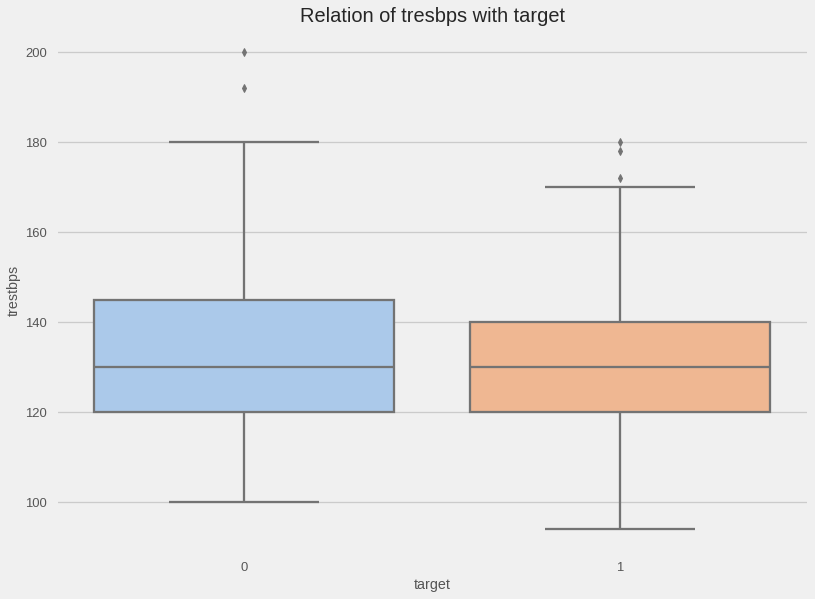

In [ ]:
# tresbps vs target
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(heartdf['target'], heartdf['trestbps'], palette = 'pastel')
plt.title('Relation of tresbps with target', fontsize = 20)
plt.show()

The above bivariate plot between tresbps(the resting blood pressure of a patient), and the target which says that whether the patient is suffering from the heart disease or not. The plot clearly suggests that the patients who are most likely to not suffer from the disease have a slighly greater blood pressure than the patients who have heart diseases.

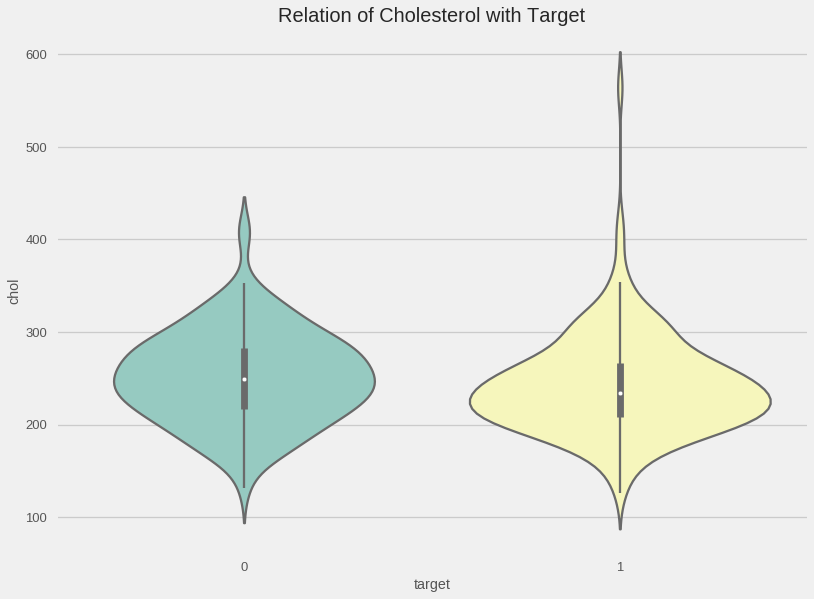

In [ ]:
# cholesterol vs target
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(heartdf['target'], heartdf['chol'], palette = 'Set3')
plt.title('Relation of Cholesterol with Target', fontsize = 20, fontweight = 30)
plt.show()

The above plot between cholesterol levels and target suggests that the Patients likely to suffer from heart diseases are having higher cholesterol levels in comparison to the patients with target 0(likely to not suffer from the heart diseases.

Hence, we can infer from the above plot that the cholesterol levels plays an important role in determining heart diseases. We all must keep our cholesterol levels in control as possible.

In [ ]:
#yellow: target 1
#blue: target 0
#cholesterol vs trestbps vs age
trace = go.Scatter3d(
    x = heartdf['chol'],
    y = heartdf['trestbps'],
    z = heartdf['age'],
    name = 'Marvel',
    mode = 'markers',
    marker = dict(
         size = 10,
         color = heartdf['target']
    )
)

df = [trace]

layout = go.Layout(
    title = 'Cholestrol vs Heart Rate vs Age',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Cholestrol'),
            yaxis = dict(title  = 'Heart Rate'),
            zaxis = dict(title  = 'Age')
        )
    
)
fig = go.Figure(data = df, layout=layout)
py.iplot(fig)

In this graphic we can see all the data in relation to the Cholesterol(x), Heart Rate(y) and Age(z). All of them are moving in the same numbers of cholesterol except a few highlighting one with 564 mg/dl. The normal average of cholesterol is between 125 and 200 mg/dl and several data are more than 200 mg/dl. As for Heart Rate is more dispersed than cholesterol. The normal blood pressure is 120/80 mm/Hg. The are a lot of cases that are below the normal pressure but they are really close to the limit and the rest are above this limit.The population is between 29 and 77 years old. 

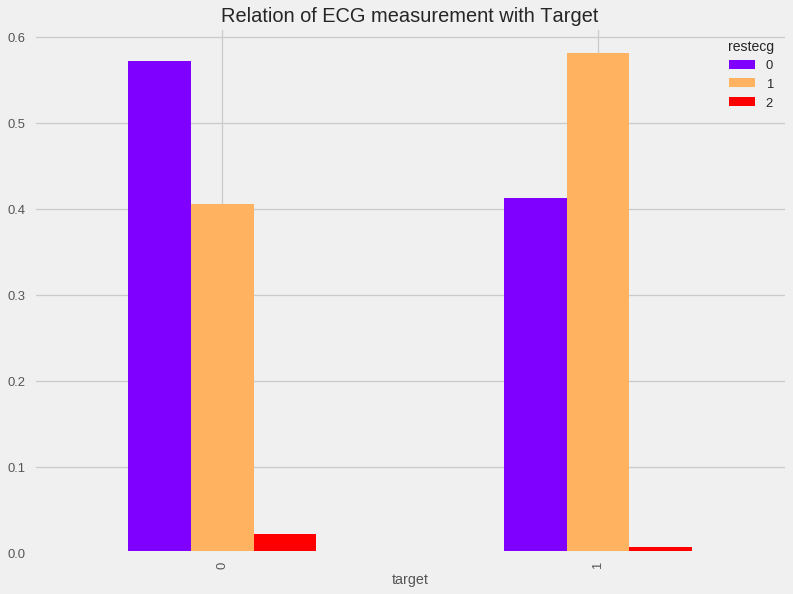

In [ ]:
 # Resting electrocardiographic measurement vs target
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(heartdf['target'], heartdf['restecg']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 3, 5)))
plt.title('Relation of ECG measurement with Target', fontsize = 20, fontweight = 30)
plt.show()

The above plot is column bar chart representing target vs ECG Measurements(Electro Cardio Gram), The above plot shows that the more number of patients not likely to suffer from heart diseases are having restscg value 0 whereas more number of people have restecg value 1 in case of more likelihood of suffering from a heart disease.

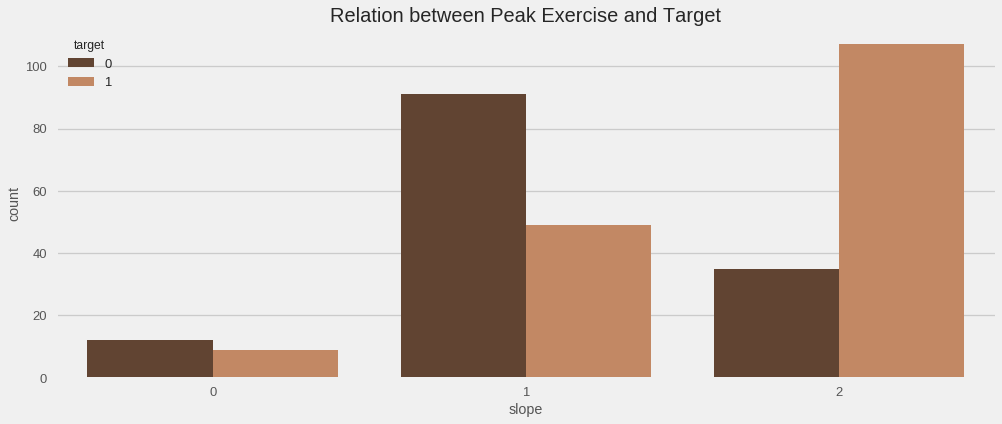

In [ ]:
#Number of people who have heart disease according to peak exercise
plt.figure(figsize=(15,6))
sns.countplot(x='slope',data = heartdf, hue = 'target',palette='copper')
plt.title('Relation between Peak Exercise and Target', fontsize = 20, fontweight = 30)
plt.show()

This plot clearly shows that the patients who are not likely to suffer from any heart diseases are mostly having value 1 means upsloping, whereas very few people suffering from heart diseases have upsloping pattern in exercises. Also, Flat Exercises are mostly seen in the cases of Patients who are more likely to suffer from heart diseases.

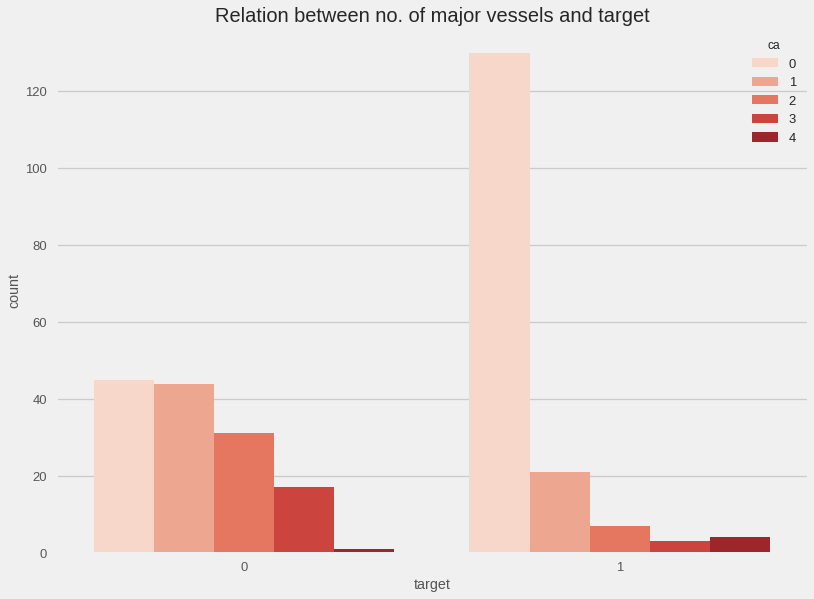

In [ ]:
#ca: The number of major vessels (0-3)
# number of patients who have heart disease according to #of major vessels
sns.countplot(x='target',data = heartdf, hue = 'ca',palette='Reds')
plt.title('Relation between no. of major vessels and target', fontsize = 20, fontweight = 30)
plt.show()

The above Bivariate plot between Target and Number of Major Vessels, shows that the patients who are more likely to suffer from Heart diseases are having high values of Major Vessels whereas the patients who are very less likely to suffer from any kind of heart diseases have very low values of Major Vessels.

Hence, It is also helpful in determining the heart diseases, the more the number of vessels, the more is the chance of suffering from heart diseases.

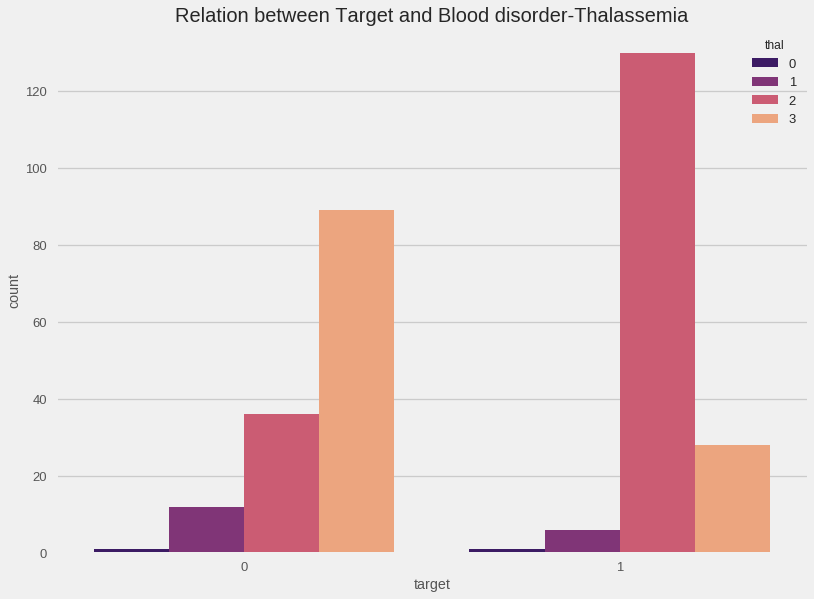

In [ ]:
# checking the relation between target and thal
#thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
sns.countplot(x='target',data = heartdf, hue = 'thal',palette='magma')
plt.title('Relation between Target and Blood disorder-Thalassemia', fontsize = 20, fontweight = 30)
plt.show()

In the above Boxen plot between Target and a Blood disorder called Thalassemia, It can be easily inferred that the patients suffering from heart diseases have low chances of also suffering from thalassemia in comparison to the patients who are less likely to suffer from the heart diseases. Hence, It is also a good feature to classify heart diseases.

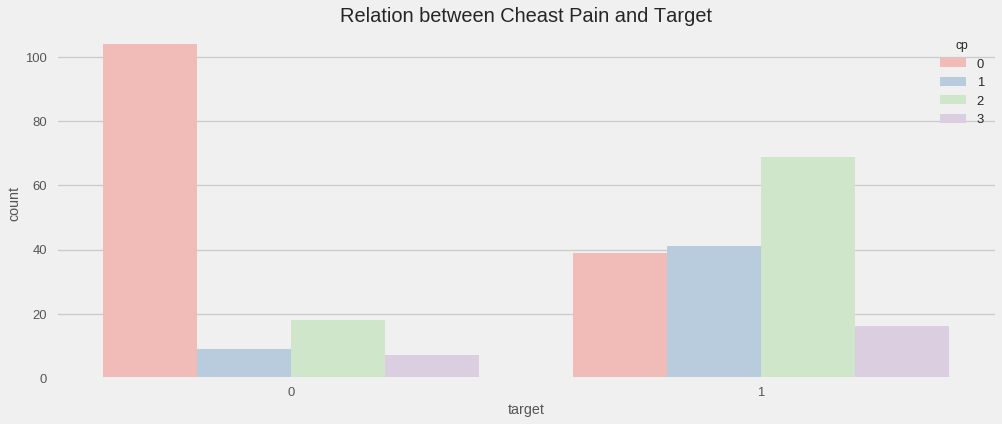

In [ ]:
#cheart pain vs target
#cp: 0-3
plt.figure(figsize=(15,6))
sns.countplot(x='target',data = heartdf, hue = 'cp',palette='Pastel1')
plt.title('Relation between Cheast Pain and Target', fontsize = 20, fontweight = 30)
plt.show()

This graphic show us the chest pain of the people studied in this data. Mostly persons without heart disease has typical type of chest pain(red column) and the other three types they are really similar highlighting the non-angina type (green colum). Chest pain in persons with heart disease are more distributed, standing out the Non angina type over the others. The Asymptomatic type is the lower case in both situations

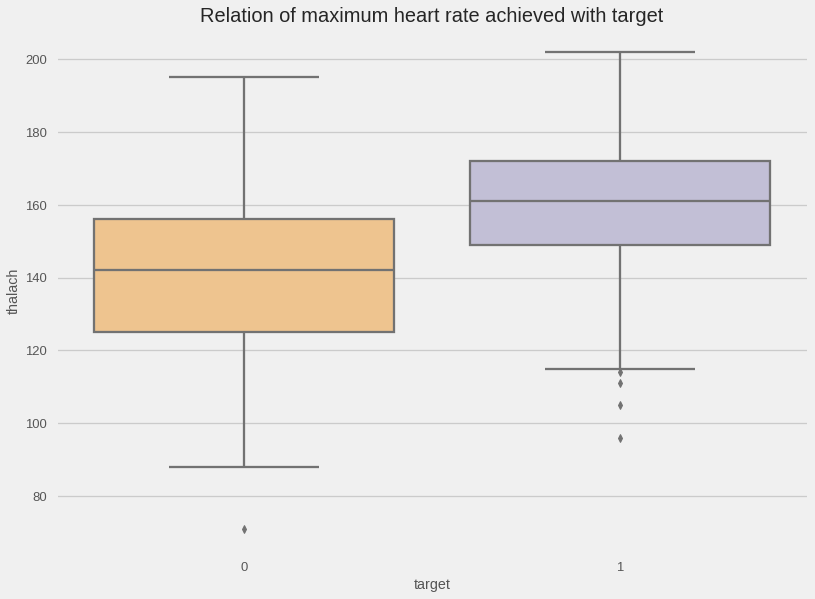

In [ ]:
# thalach vs target
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(heartdf['target'], heartdf['thalach'], palette = 'PuOr')
plt.title('Relation of maximum heart rate achieved with target', fontsize = 20)
plt.show()

The plot above shows the relation between the maximum heart rate achieved and the target - whether the patient has a heart disease or not. As we can see in the graph, the patients who have heart disease have higher heart rate (between 150 and 170) while those who do not have it are have a rate between 125 and 155. 

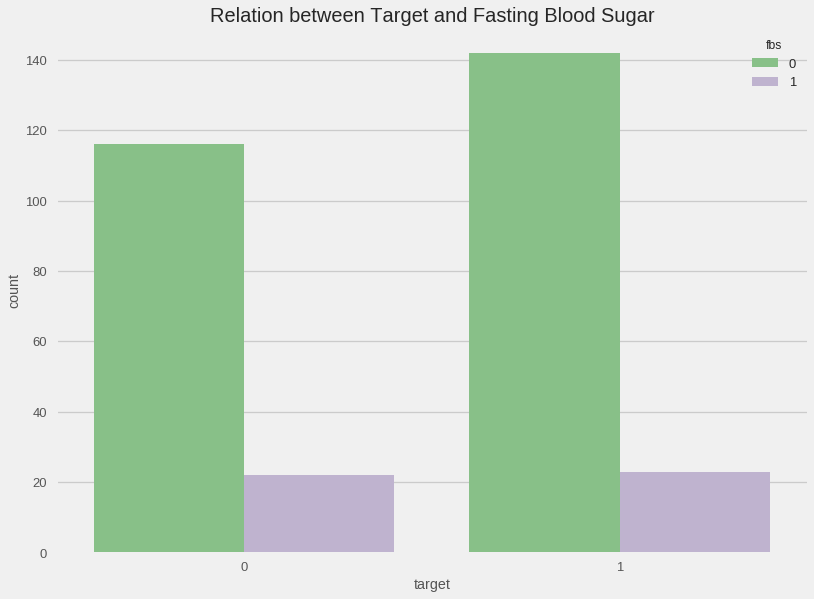

In [ ]:
# checking the relation between target and fbs
#fbs: fasting blood sugar > 120 mg/dl (1=true, 0=false)
sns.countplot(x='target',data = heartdf, hue = 'fbs',palette='Accent')
plt.title('Relation between Target and Fasting Blood Sugar', fontsize = 20, fontweight = 30)
plt.show()

Fasting blood sugar is used to determine if a patient has diabetes or not. When the sample is higher than 120 mg/dl, then the patient is considered to have prediabetes or diabetes. Looking at the plot above, we see that diabetes does not really affect when having heart disease since there is a greater number of people with heart disease and low fasting blood sugar levels. 

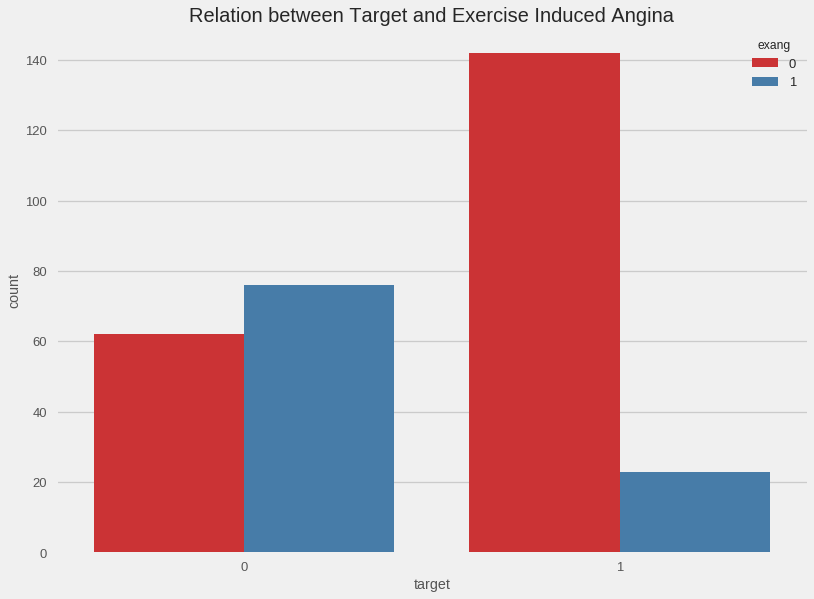

In [ ]:
# checking the relation between target and exang
#exang: exercise induced angina (1=yes, 0=no)
sns.countplot(x='target',data = heartdf, hue = 'exang',palette='Set1')
plt.title('Relation between Target and Exercise Induced Angina', fontsize = 20, fontweight = 30)
plt.show()

Looking at the relationship between target and exercise induced angina, we can appreciate that most of the people who have heart disease do not have had exercise induced angina before, which is quite relevant. 

# **Building and Testing Models**

First of all, we prepare our data before building the models. From the exploration the dataset we did above, we saw that we need to convert some categorical features into dummy features before training the Machine Learning models. 
Those are 'cp', 'thal' and 'slope'.

To get this done, we are going to be using the method 'get_dummies'.

In [ ]:
a = pd.get_dummies(heartdf['cp'], prefix = "cp")
b = pd.get_dummies(heartdf['thal'], prefix = "thal")
c = pd.get_dummies(heartdf['slope'], prefix = "slope")

In [ ]:
frames = [heartdf, a, b, c]
heartdf = pd.concat(frames, axis = 1)
heartdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
heartdf = heartdf.drop(columns = ['cp', 'thal', 'slope'])
heartdf.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


The dataset is ready to train the models.

Now we are going to split the data into training and test sets. 
- Training data: to find the patterns. (80%)
- Test data: to use the patterns. (20%)


In [ ]:
y = heartdf.target.values
x_data = heartdf.drop(['target'], axis = 1)

We are going to normalize the data because, as we discovered before, the variables have different ranges of values.

In [ ]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
x_train

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
74,0.291667,0.0,0.264151,0.198630,0.0,0.5,0.717557,0.0,0.032258,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
153,0.770833,0.0,0.490566,0.347032,0.0,0.0,0.618321,0.0,0.000000,0.25,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
64,0.604167,1.0,0.433962,0.194064,1.0,0.0,0.717557,0.0,0.000000,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
296,0.708333,0.0,0.283019,0.162100,0.0,0.5,0.496183,1.0,0.000000,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
287,0.583333,1.0,0.566038,0.242009,0.0,0.0,0.709924,0.0,0.000000,0.25,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.291667,1.0,0.358491,0.276256,1.0,0.0,0.549618,1.0,0.016129,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
192,0.520833,1.0,0.245283,0.141553,0.0,0.5,0.320611,0.0,0.225806,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
117,0.562500,1.0,0.245283,0.152968,0.0,0.0,0.694656,0.0,0.306452,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
47,0.375000,1.0,0.415094,0.299087,0.0,0.0,0.648855,0.0,0.000000,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


As we can see, it is randomly distributed.

Now, we proceed to build and test the models using sklearn library.



## Logistic Regression

Logistic regression is used to predict the probability of a categorical dependent variable. This dependent variable is a binary variable that contains data code as 0 or 1. In our model for the logistic regression accuracy is 86.88% which is very good. This means that the model was able to predict 86.88% of cases correctly. As for the R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable. In our case is 0.46, the higher score the best model. Our model is directly related with the human behavior and is typically to have R-squared values lower than 50% because humans are very harder to predict.

In [ ]:
accuracies = {}

lr_c=LogisticRegression(random_state=0)
lr_c.fit(x_train,y_train)
lr_pred=lr_c.predict(x_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
accuracies['Logistic Regression'] = lr_ac
print('LogisticRegression_accuracy:\t',lr_ac)
lr_r2 = metrics.r2_score(y_test, lr_pred)
print('LogisticRegression_r2:\t',lr_r2)


LogisticRegression_accuracy:	 0.8688524590163934
LogisticRegression_r2:	 0.46840958605664496


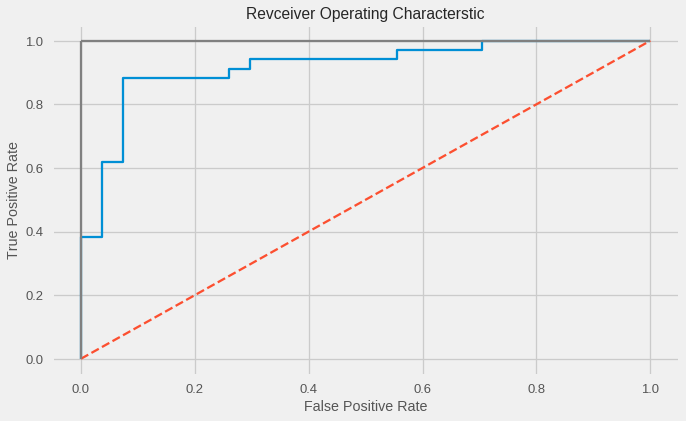

In [ ]:
y_probabilities_lr = lr_c.predict_proba(x_test)[:,1]
false_positive_rate_lr,true_positive_rate_lr,threshold_lr = roc_curve(y_test,y_probabilities_lr)
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lr,true_positive_rate_lr)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
lr_roc = roc_auc_score(y_test,y_probabilities_lr)
print('LogisticRegression_roc:\t',lr_roc)

LogisticRegression_roc:	 0.9183006535947713


## Decision Tree

Now we will be applying the decision tree algorithm. 

What is doea is creates a decision tree based on which, it selects the class values to each data point. It is important to know that we can change the maximum number of features to be considered when the model is being created. 

In [ ]:
dtree_c=DecisionTreeClassifier()
dtree_c.fit(x_train,y_train)
dtree_pred=dtree_c.predict(x_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)
accuracies['Decision Tree'] = dtree_ac
print('DecisionTree_accuracy:\t\t',dtree_ac)
dtree_r2 = metrics.r2_score(y_test, dtree_pred)
print('DecisionTree_r2:\t',dtree_r2)


DecisionTree_accuracy:		 0.7868852459016393
DecisionTree_r2:	 0.13616557734204804


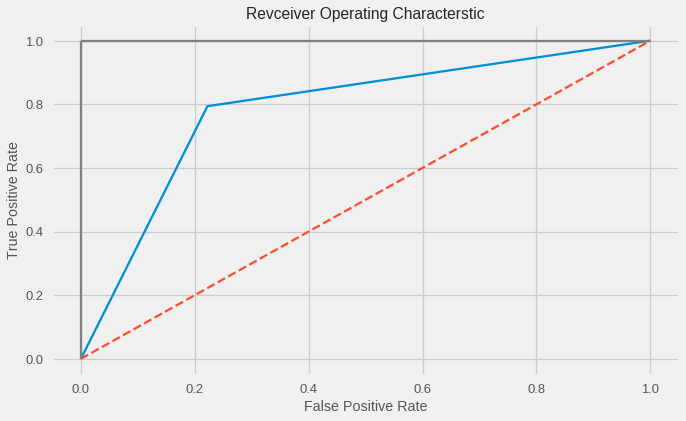

In [ ]:
y_probabilities_dtree = dtree_c.predict_proba(x_test)[:,1]
false_positive_rate_dtree,true_positive_rate_dtree,threshold_dtree = roc_curve(y_test,y_probabilities_dtree)
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_dtree,true_positive_rate_dtree)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
dtree_roc = roc_auc_score(y_test,y_probabilities_dtree)
print('DecisionTree_roc:\t',dtree_roc)

DecisionTree_roc:	 0.7859477124183006


## Random Forest

Another algorithm used by many people in previous work is Random Forest. 

This model takes the concept of decision trees to another level. It creates a forest of trees where each tree is made by a random selection of features from the total features. Here, we can vary the number of trees that will be used to predict the class. We are going to stik to the deafult number, which is 100. 

In [ ]:
rdf_c=RandomForestClassifier(random_state=0)
rdf_c.fit(x_train,y_train)
rdf_pred=rdf_c.predict(x_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)
accuracies['Random Forest'] = rdf_ac
print('RandomForest_accuracy:\t\t',rdf_ac)
rdf_r2 = metrics.r2_score(y_test, rdf_pred)
print('RandomForest_r2:\t',rdf_r2)


RandomForest_accuracy:		 0.8852459016393442
RandomForest_r2:	 0.5348583877995643


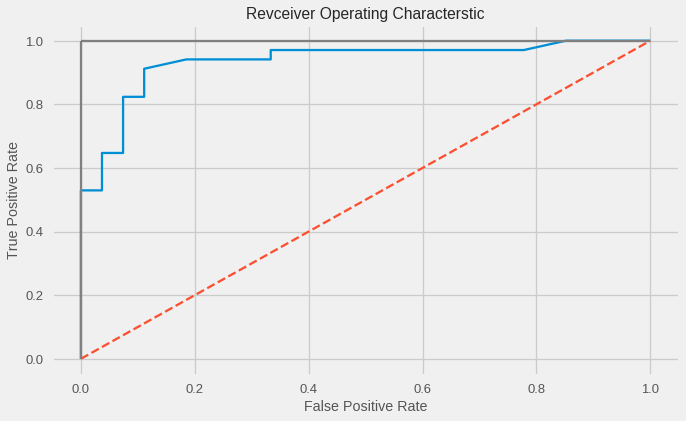

In [ ]:
y_probabilities_rdf = rdf_c.predict_proba(x_test)[:,1]
false_positive_rate_rdf,true_positive_rate_rdf,threshold_rdf = roc_curve(y_test,y_probabilities_rdf)
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_rdf,true_positive_rate_rdf)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
rdf_roc = roc_auc_score(y_test,y_probabilities_rdf)
print('RandomForest_roc:\t',rdf_roc)

RandomForest_roc:	 0.934640522875817


## K Nearest Neighbors

We chose this algorithm because it was one of the best we found when we were doing the review of past projects.
This classifier what it does is look for the classes of K nearest neighbors of a given data point and depending on the majority class, it assigns a class to this data point. However, the number of neighbors can be varied , we din't specify any number because the accuracy was very high with the default value. 

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_cm=confusion_matrix(y_test,knn_pred)
knn_ac=accuracy_score(knn_pred,y_test)
accuracies['KNN'] = knn_ac
print('KNN_accuracy:\t\t\t',knn_ac)
knn_r2 = metrics.r2_score(y_test,knn_pred)
print('KNN_r2:\t' ,knn_r2)


KNN_accuracy:			 0.8524590163934426
KNN_r2:	 0.4019607843137255


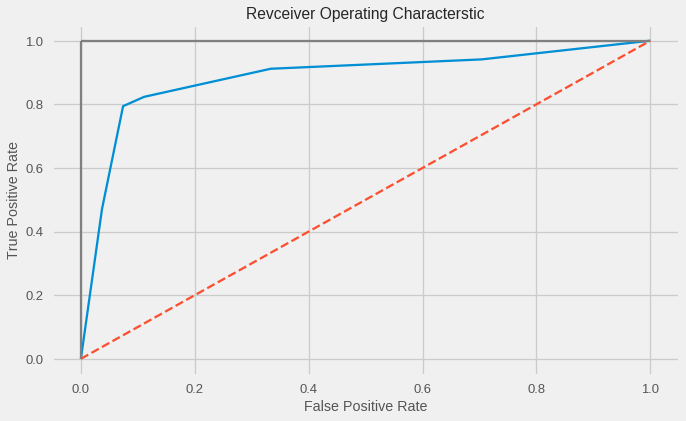

In [ ]:
y_probabilities_knn = knn.predict_proba(x_test)[:,1]
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,y_probabilities_knn)
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
knn_roc = roc_auc_score(y_test,y_probabilities_knn)
print('KNN_roc:\t',knn_roc)

KNN_roc:	 0.8856209150326798


## Support Vector Classifier

SVC is also another algorithm that has a very high accuracy in the previous work.

This classifier goal is forming a hyperplane that can divide the classes as much as it can be adjusting the distance between the hyperplane and  the data points. There are different kernels based on which the hyperplane is decided. Once again, we decided to go by the default one (rbf) because the accuracy given is very good.

In [ ]:
svc_c=SVC(random_state=0,probability=True)
svc_c.fit(x_train,y_train)
svc_pred=svc_c.predict(x_test)
sv_cm=confusion_matrix(y_test,svc_pred)
sv_ac=accuracy_score(y_test, svc_pred)
accuracies['SVM'] = sv_ac
print('SVM_classifier_accuracy:\t',sv_ac)
sv_r2 = metrics.r2_score(y_test, svc_pred)
print('SVM_r2:\t',sv_r2)


SVM_classifier_accuracy:	 0.8852459016393442
SVM_r2:	 0.5348583877995643


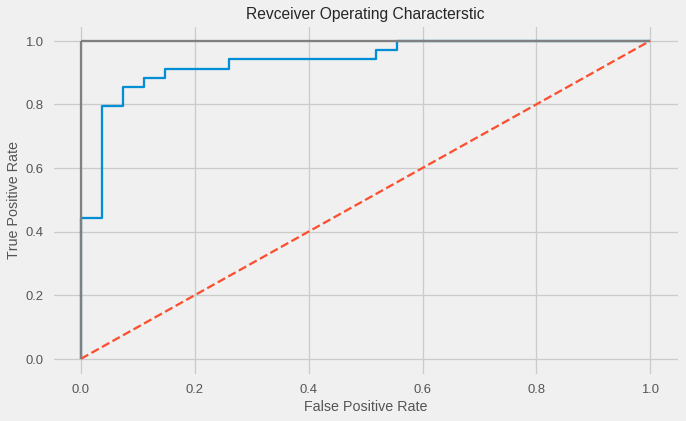

In [ ]:
y_probabilities_svc = svc_c.predict_proba(x_test)[:,1]
false_positive_rate_svc,true_positive_rate_svc,threshold_svc = roc_curve(y_test,y_probabilities_svc)
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_svc,true_positive_rate_svc)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
sv_roc = roc_auc_score(y_test,y_probabilities_svc)
print('KNN_roc:\t',sv_roc)


KNN_roc:	 0.9357298474945532


## Naive Bayes 

Naive Bayes is one of the most widely used classifiers because of its simplicity and speed. It is a supervised classification and prediction technique that builds models that predict the probability of possible outcomes.

In [ ]:
gaussian=GaussianNB()
gaussian.fit(x_train,y_train)
bayes_pred=gaussian.predict(x_test)
bayes_cm=confusion_matrix(y_test,bayes_pred)
bayes_ac=accuracy_score(bayes_pred,y_test)
accuracies['Naive Bayes'] = bayes_ac
print('Bayes_accuracy:\t\t\t',bayes_ac)
bayes_r2 = metrics.r2_score(y_test, bayes_pred)
print('Bayes_r2:\t',bayes_r2)

Bayes_accuracy:			 0.8688524590163934
Bayes_r2:	 0.46840958605664496


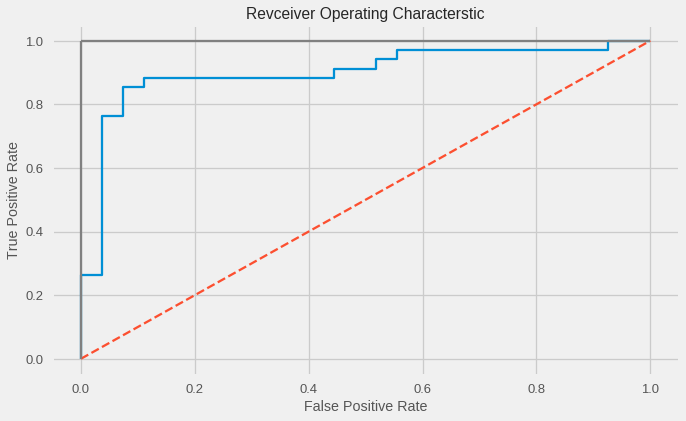

In [ ]:
y_probabilities_bayes = gaussian.predict_proba(x_test)[:,1]
false_positive_rate_bayes,true_positive_rate_bayes,threshold_bayes = roc_curve(y_test,y_probabilities_bayes)
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_bayes,true_positive_rate_bayes)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
bayes_roc = roc_auc_score(y_test,y_probabilities_bayes)
print('Bayes_roc:\t',bayes_roc)

Bayes_roc:	 0.8997821350762527



# **Comparing Models**

To evaluate our models, we are going to be using the accuracy of each of them, a confusion matrix, R-squared score, and the ROC.

Classification Accuracy or just **Accuracy** is simply measuring how good all the cases were classified. Is is calculated dividing the number of correct predictions by the total number of predictions made.

The **confusion matrix** shows the right predicted as well as the wrong predicted values by a classifier.
The sum of True Positive and True Negative, from the confusion matrix, is the number of right classified entries by the classifier.

![texto alternativo](https://www.researchgate.net/profile/Steven_Mcelwee2/publication/327190637/figure/fig1/AS:662947315597312@1535070365706/Confusion-matrix-for-binary-classification.png)

**R-Sqaure** is a statistical measure between 0 and 1 which calculates how similar a regression line is to the data it’s fitted to. If it’s a 1, the model 100% predicts the data variance; if it’s a 0, the model predicts none of the variance. R-Squared = Explained variance of the model / Total variance of the target variable.
This number can be interpreted as: % of the change in Y can be explained by the change in X.

**ROC** - Receiver Operating Characteristic - curve is the model selection metric for bi–multi class classification problem. Is a probability curve for different classes. ROC tells us how good the model is for distinguishing the given classes, in terms of the predicted probability. The area covered by the curve is the area between the 
dashed line (ROC) and the axis. This area covered is AUC. The bigger the area covered, the better the machine learning models is at distinguishing the given classes. Ideal value for AUC is 1.



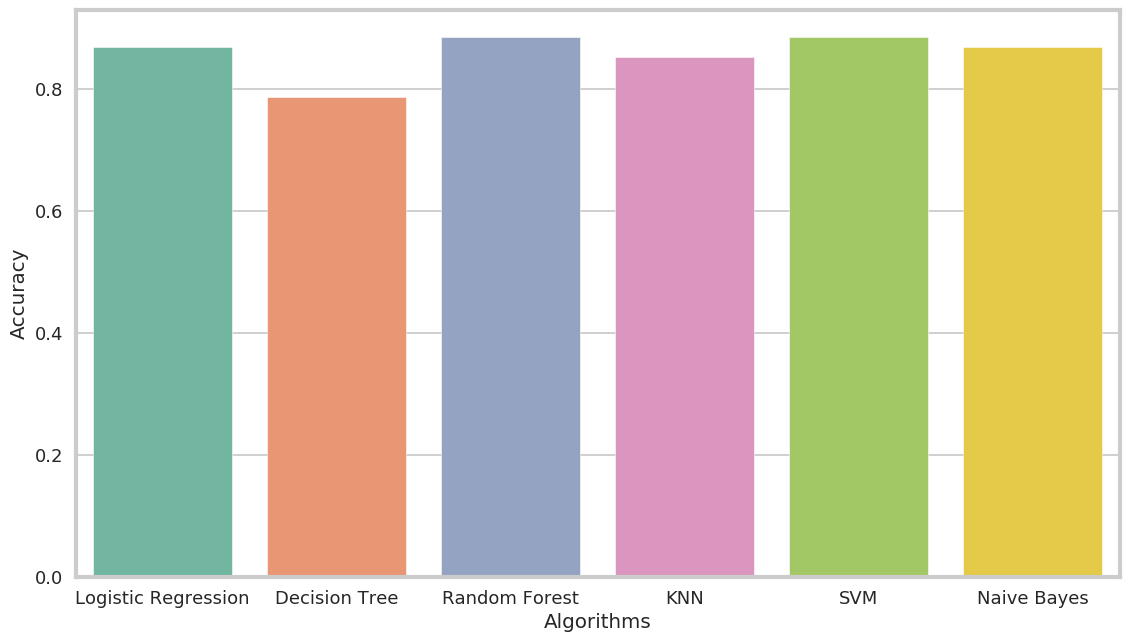

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='Set2')
plt.show()

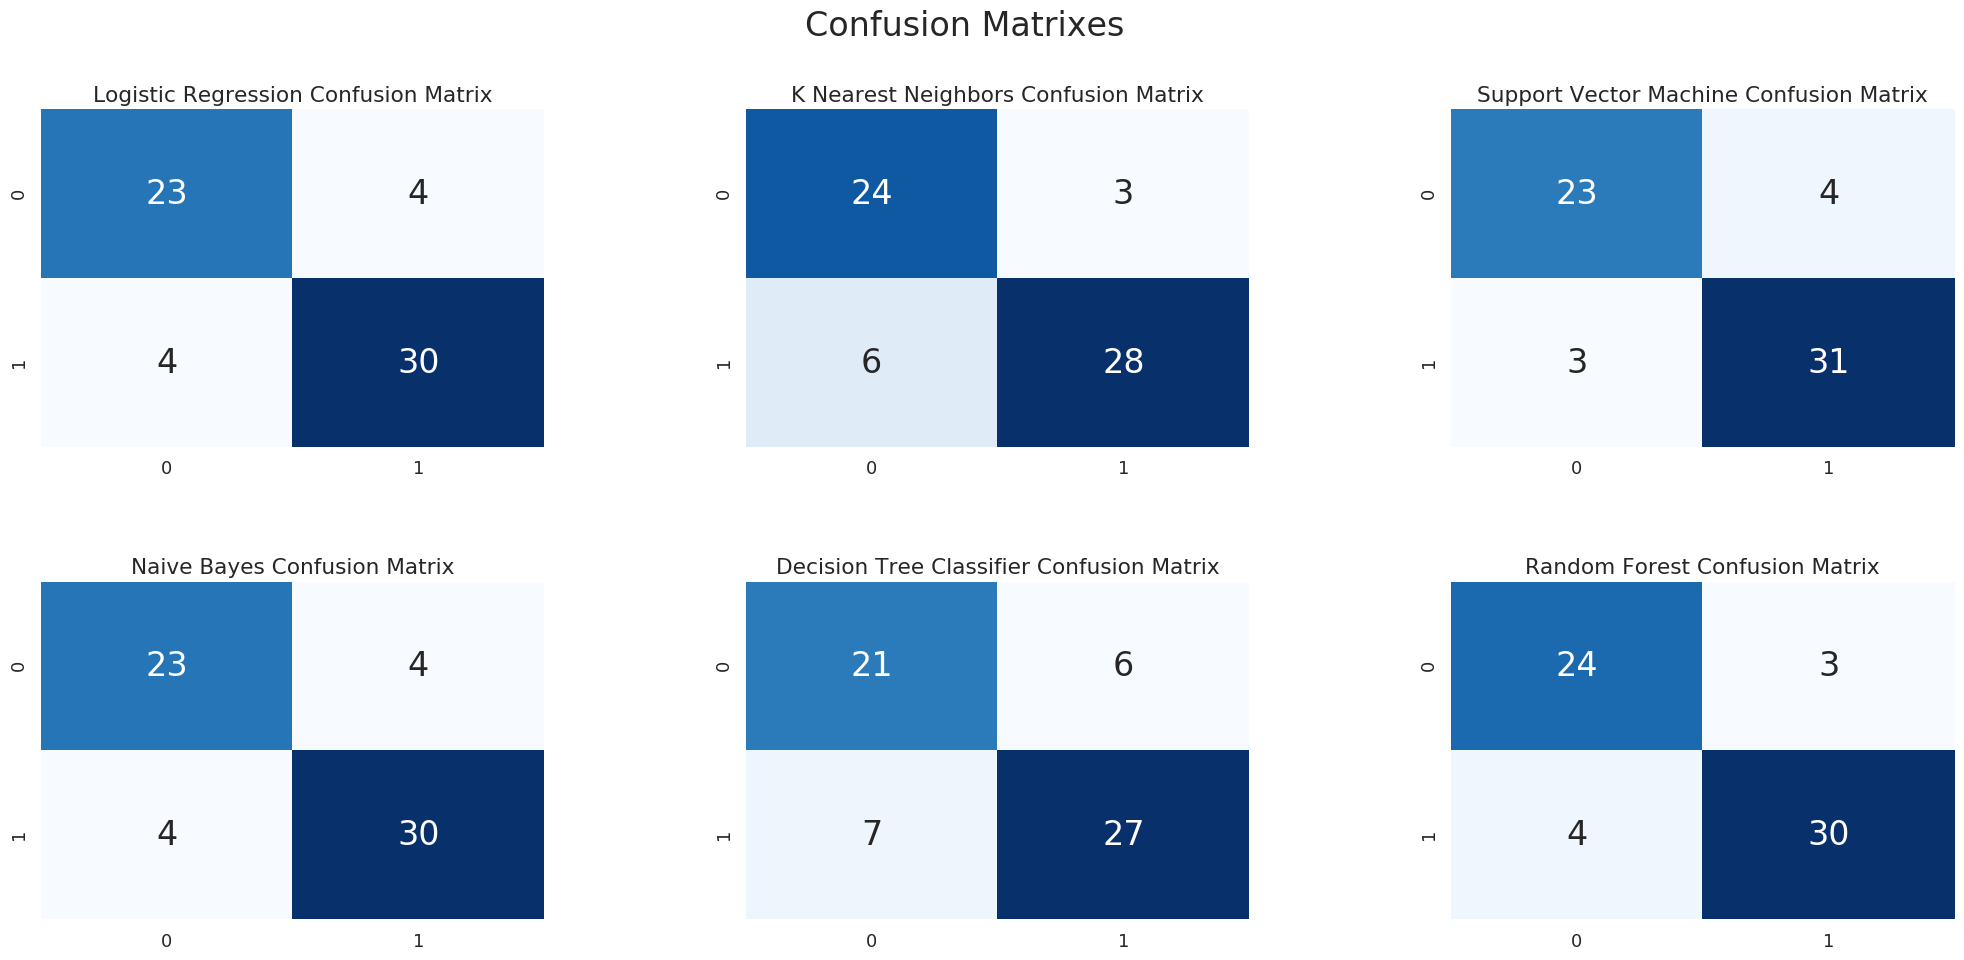

In [ ]:
plt.figure(figsize=(22,10))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(lr_cm,annot=True,cmap="Blues",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(dtree_cm,annot=True,cmap="Blues",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(knn_cm,annot=True,cmap="Blues",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(sv_cm,annot=True,cmap="Blues",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(bayes_cm,annot=True,cmap="Blues",cbar=False, annot_kws={"size": 24})


plt.show()

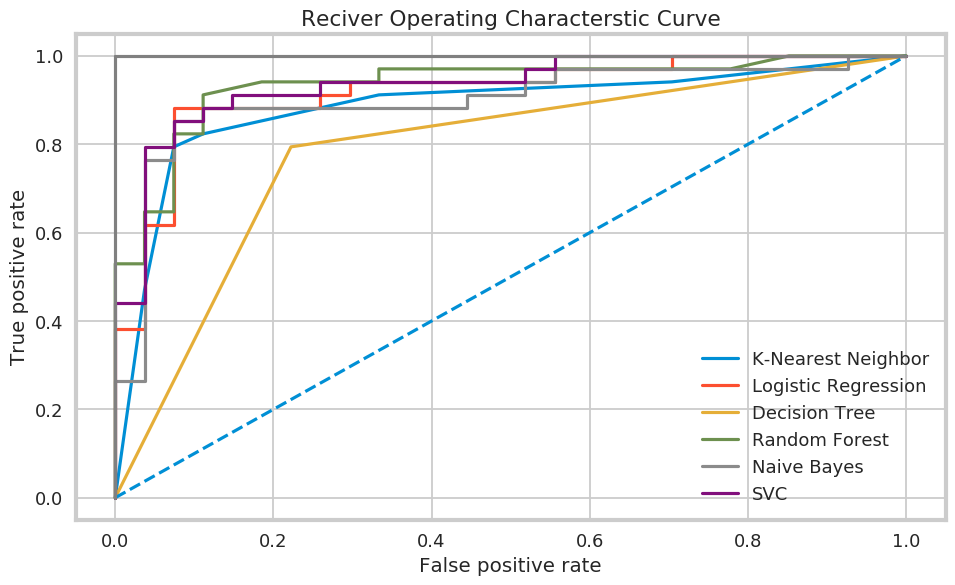

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(false_positive_rate_knn,true_positive_rate_knn,label='K-Nearest Neighbor')
plt.plot(false_positive_rate_lr,true_positive_rate_lr,label='Logistic Regression')
plt.plot(false_positive_rate_dtree,true_positive_rate_dtree,label='Decision Tree')
plt.plot(false_positive_rate_rdf,true_positive_rate_rdf,label='Random Forest')
plt.plot(false_positive_rate_bayes,true_positive_rate_bayes,label='Naive Bayes')
plt.plot(false_positive_rate_svc,true_positive_rate_svc,label='SVC')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
predictions = [['Model', 'Accuracy','R-squared','ROC'],['Logistic Regression',  lr_ac, lr_r2, lr_roc], ['Decision Tree',  dtree_ac, dtree_r2, dtree_roc],
 ['Random Forest',  rdf_ac,  rdf_r2, rdf_roc], ['KNN',  knn_ac, knn_r2, knn_roc],
  ['SVC',  sv_ac,  sv_r2, sv_roc],['Naive Bayes',  bayes_ac,  bayes_r2, bayes_roc]]
print(tabulate(predictions, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════╤════════════╤═════════════╤══════════╕
│ Model               │   Accuracy │   R-squared │      ROC │
╞═════════════════════╪════════════╪═════════════╪══════════╡
│ Logistic Regression │   0.868852 │    0.46841  │ 0.918301 │
├─────────────────────┼────────────┼─────────────┼──────────┤
│ Decision Tree       │   0.786885 │    0.136166 │ 0.785948 │
├─────────────────────┼────────────┼─────────────┼──────────┤
│ Random Forest       │   0.885246 │    0.534858 │ 0.934641 │
├─────────────────────┼────────────┼─────────────┼──────────┤
│ KNN                 │   0.852459 │    0.401961 │ 0.885621 │
├─────────────────────┼────────────┼─────────────┼──────────┤
│ SVC                 │   0.885246 │    0.534858 │ 0.93573  │
├─────────────────────┼────────────┼─────────────┼──────────┤
│ Naive Bayes         │   0.868852 │    0.46841  │ 0.899782 │
╘═════════════════════╧════════════╧═════════════╧══════════╛


# **Results and Findings**

First of all, we want to highlight the knowledge about machine learning algorithms, since it was a fairly new topic for us. Learning, both theoretically with class presentations and in practice in our project, has greatly enriched us.

We started with the data exploration where we got an overview of the dataset, checked for any missing values and learned about the different features in the dataset. That allowed us to learn how to use the different libraries availables to create plots easily such as matplotlib and seaborn. During the data preparation part, we converted the cathegorical features and grouped them into numeric ones. Then we normalized the data and started training the different models and checked how good they are. Of course there is always going to be room for improvement, like deciding which parameters can increase their accuracy or identifying which features are more important when predicting heart diseases.

Regarding the results that we have obtained for the prediction of heart disease,we must emphasize that the highest accuracy is achieved by SVC and Random Forest (88.852), just as we found out when we were checking previous projects. We need to mention that the algorithms are implemented with the default parameters. As for ROC, SVC has the highest value followed by Random Forest and Logistic Regression. To finish, once again, SVC and Random Forest got the best R-Squared score: 0.53. 

Heart Disease is one of the major concerns for society today.
It is difficult to manually determine the odds of getting heart disease based on risk factors. However, machine learning techniques very are useful to predict the output from existing data.

We think this has a big future and it will become very important in health care,as well as in many other areas where data analysis and machine learning will make life much easier thanks to its availability to quickly and automatically produce models and analyze big quantity of data. 

